In [1]:
import tensorflow as tf
import gezi
import melt
import numpy as np

tensorflow_version: 1.14.0
torch_version: 1.3.1
Using TensorFlow backend.


The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



In [2]:
model_dir = '/home/gezi/tmp/rank/data/video_hour_sgsapp_v2/exps/jump.all.2bin/'
bins_per_hour = 2
model_dir = '/home/gezi/tmp/rank/data/video_hour_sgsapp_v2/exps/jump.all.1bin/'
bins_per_hour = 1
# model_dir = '/home/gezi/tmp/rank/data/video_hour_sgsapp_v2/exps/jump.all.nodense/'
model_dir = '/home/gezi/tmp/rank/data/video_hour_sgsapp_v3/exps/2019121320.time.v3/'
# model_dir = '/home/gezi/tmp/rank/data/video_hour_sgsapp_v2/exps/jump.luopan/'
bins_per_hour = 6
model_path = melt.latest_checkpoint(model_dir)
print(model_path)

/home/gezi/tmp/rank/data/video_hour_sgsapp_v3/exps/2019121320.time.v3/model.ckpt-2019121518-1.00-1052


In [3]:
num_bins = 24 * bins_per_hour + 2

In [4]:
reader = tf.compat.v1.train.NewCheckpointReader(model_path)

In [5]:
emb = reader.get_tensor('wide_deep/deep/time_emb/embeddings')

In [6]:
len(emb)

500

In [7]:
emb[0]

array([ 0.04680015,  0.01570802,  0.00562106, -0.0089563 ,  0.00222861,
        0.02928542, -0.0022328 , -0.02446822, -0.04732307,  0.00311764,
        0.03602021, -0.02898865,  0.01718954,  0.00749937,  0.0422504 ,
        0.00053778,  0.01390411,  0.03599168, -0.03035006,  0.00469597,
        0.0264877 , -0.00044423,  0.04232513,  0.03496519,  0.02024159,
        0.02992344, -0.02719302,  0.03191279,  0.02163842, -0.01233034,
       -0.03314573, -0.02951356], dtype=float32)

In [8]:
np.mean(emb[0] ** 2)

0.0006981198

In [9]:
np.mean(emb[1] ** 2)

0.03864899

In [10]:
np.mean(emb[2] ** 2)

0.01887977

In [11]:
from plotly.graph_objs import Scatter,Layout
import plotly
import plotly.offline as py
import numpy as np
import plotly.graph_objs as go

#setting offilne
plotly.offline.init_notebook_mode(connected=True)

In [12]:
data = go.Bar(
        x = list(range(num_bins)),
        y = [np.mean(emb[i] **2) for i in range(num_bins)],
    )

In [13]:
py.iplot([data])

In [14]:
data = go.Bar(
        x = list(range(num_bins)),
        y = [gezi.cosine(emb[145], emb[i]) for i in range(num_bins)],
    )

In [15]:
py.iplot([data])

In [16]:
d = np.ndarray([num_bins, num_bins])
for i in range(num_bins):
  for j in range(num_bins):
    d[i][j] = gezi.cosine(emb[i], emb[j])

In [17]:
data = go.Heatmap(
        z=d
    )
py.iplot([data])

In [18]:
import gezi
import time

In [19]:
gezi.cosine(emb[0], emb[3])

0.15009718

In [20]:
def get_time_interval(stamp, time_bins_per_hour=6):
  if not stamp:
    return 0
  x = time.localtime(stamp)
  span = int(60 / time_bins_per_hour)
#   return x.tm_hour * time_bins_per_hour + int(x.tm_min / span) + 1
  return int(x.tm_min / span) + 1

In [21]:
# scores = open('/home/gezi/tmp/rank/data/video_hour_sgsapp_v2/infos/16/2019120701/scores').readlines()
scores = open('/home/gezi/tmp/rank/data/video_hour_sgsapp_v2/infos/15/2019121600/scores').readlines()

In [22]:
index = 10 # impression time
# index = 7 # show time
times = [int(x.strip().split()[index]) for x in scores]
# times = [int(x.strip().split()[index]) for x in scores if int(x.strip().split()[2]) > 0]

In [23]:
vals = [get_time_interval(x) + 1 for x in times]

/home/gezi/env/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:218: MatplotlibDeprecationWarning:


The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.



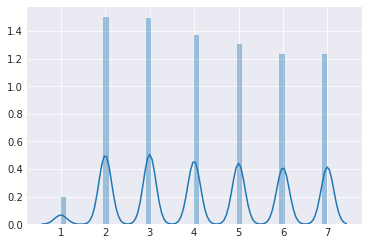

In [24]:
%matplotlib inline
import seaborn as sns

sns.set_style('darkgrid')
sns.distplot(vals)

In [25]:
data= go.Histogram(x=vals)
py.iplot([data])

In [26]:
durs = [int(x.strip().split()[2]) for x in scores if int(x.strip().split()[2]) > 0]

In [27]:
data= go.Histogram(x=durs)
py.iplot([data])

In [28]:
c = tf.constant([[1,2,3,4], [5,6,7,8], [4,3,2,1]])
tf.unsorted_segment_sum(c, tf.constant([0, 1, 0]), num_segments=2)
# ==> [[ 5,  5, 5, 5],
#       [5,  6, 7, 8]]

<tf.Tensor 'UnsortedSegmentSum:0' shape=(2, 4) dtype=int32>